In [27]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import f1_score, plot_confusion_matrix

In [2]:
data = pd.read_excel('adult.xlsx', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
                'marital_status', 'occupation', 'relationship', 'race', 'sex',
                'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 
                'revenue']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  revenue         32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
def get_unique_vals(col):
    print("Unique Values of ", col.name)
    print(col.unique())
    print("\n\n")
    
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'native_country', 'revenue']

data[cat_cols].apply(get_unique_vals)

Unique Values of  workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']



Unique Values of  education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']



Unique Values of  marital_status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']



Unique Values of  occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']



Unique Values of  relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']



Unique Values of  race
[' White' ' Black' ' Asian-Pac-Islan

workclass         None
education         None
marital_status    None
occupation        None
relationship      None
race              None
sex               None
native_country    None
revenue           None
dtype: object

In [7]:
def fix_vals(row):
    for col in cat_cols:
        row[col] = row[col].lstrip()
        if row[col] == '?':
            row[col] = np.nan
        
    return row

data = data.apply(fix_vals, axis = 1)
data['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', nan, 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [8]:
data.fillna('Missing', inplace = True)

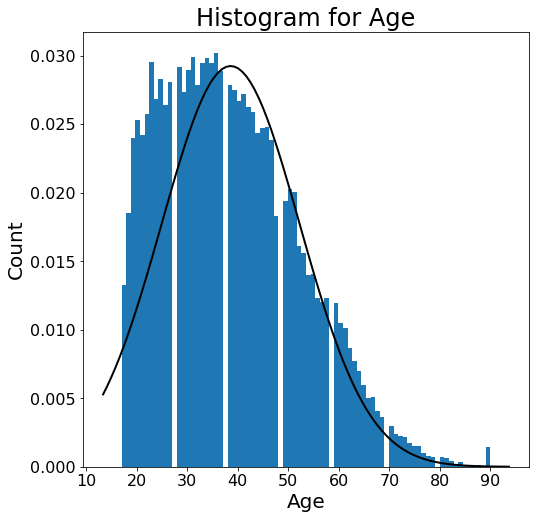

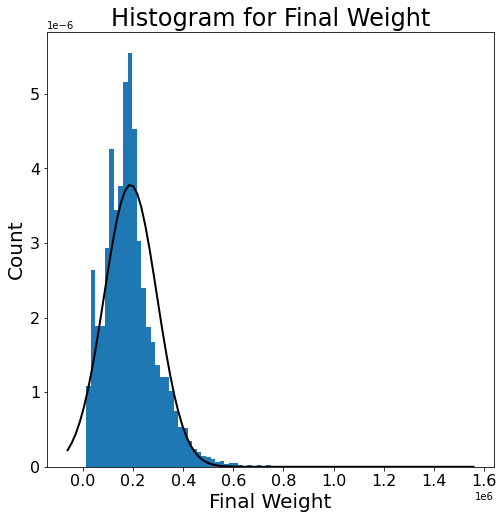

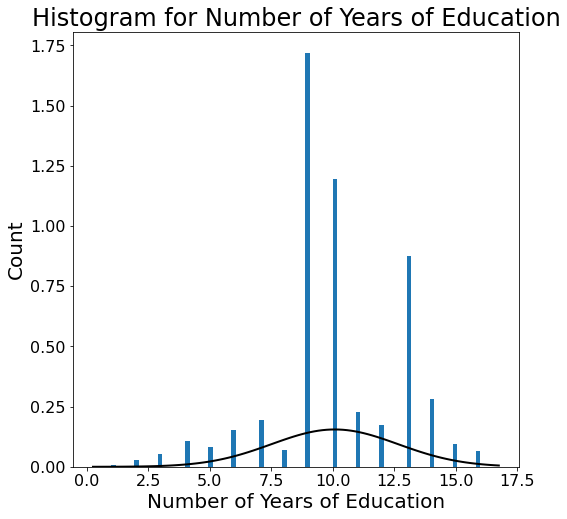

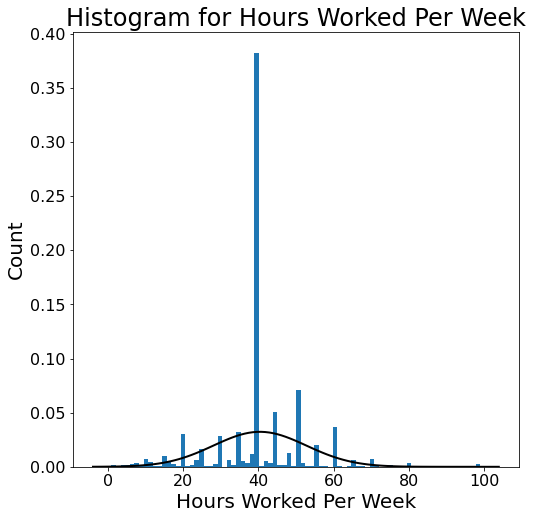

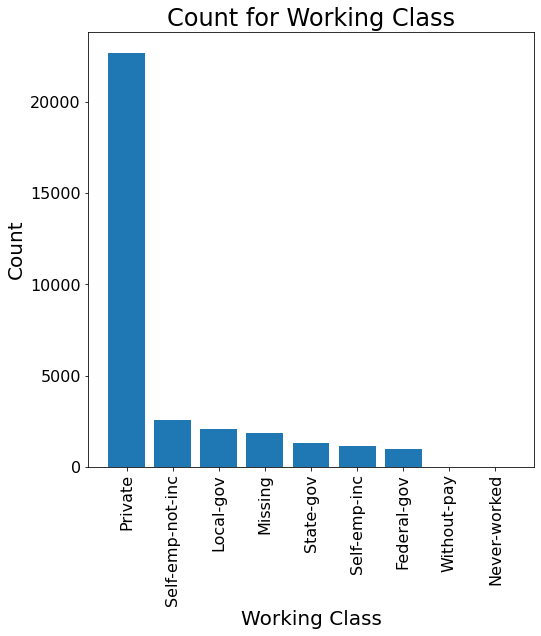

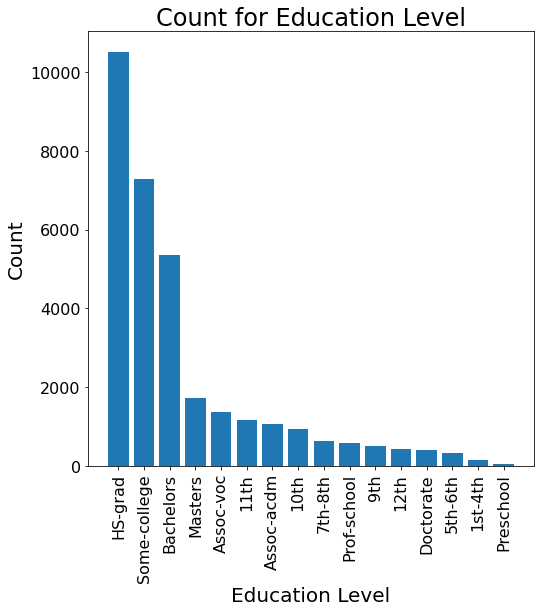

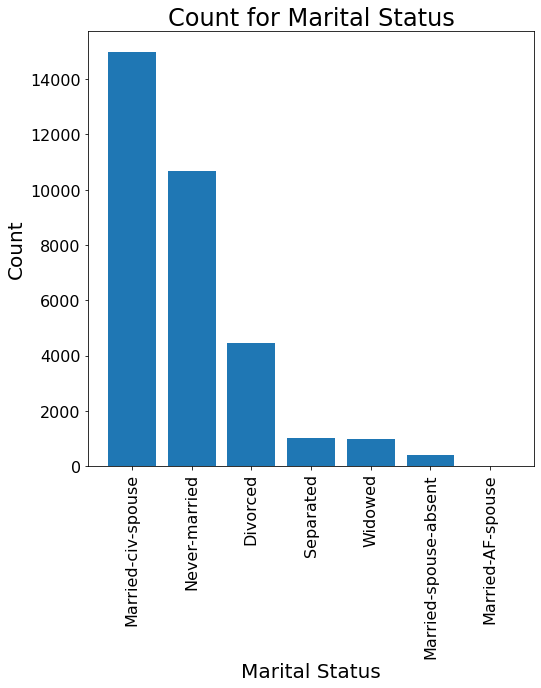

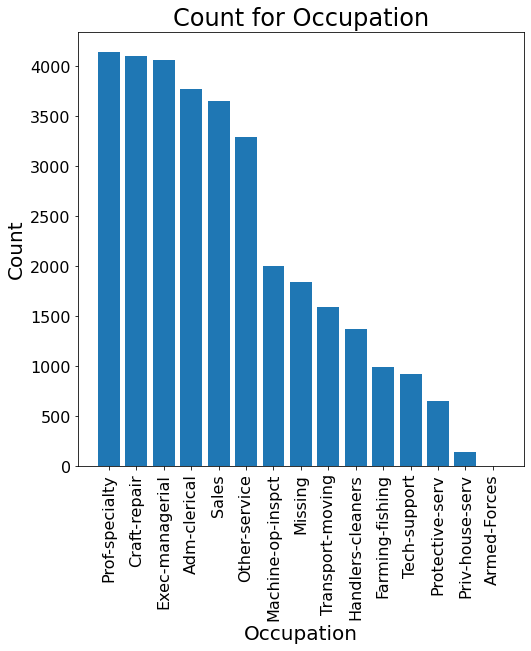

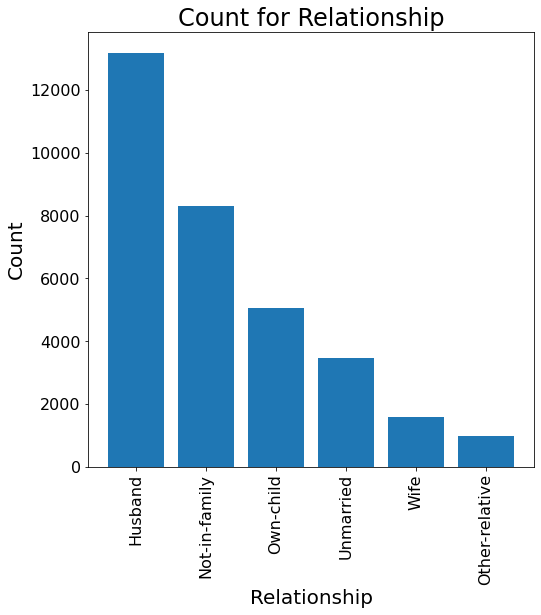

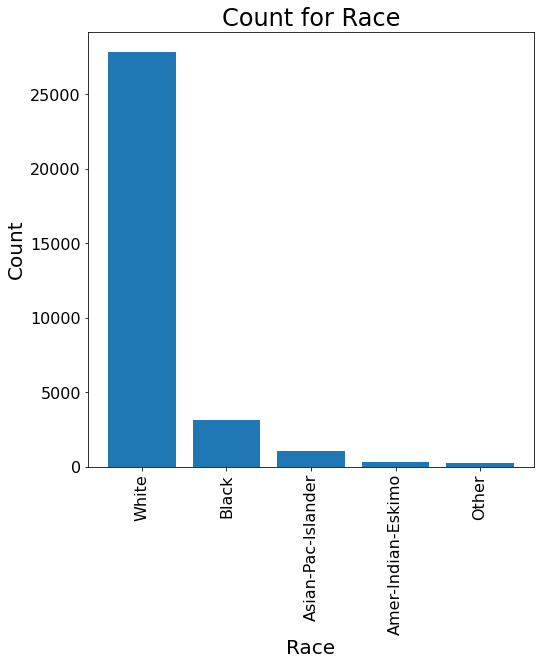

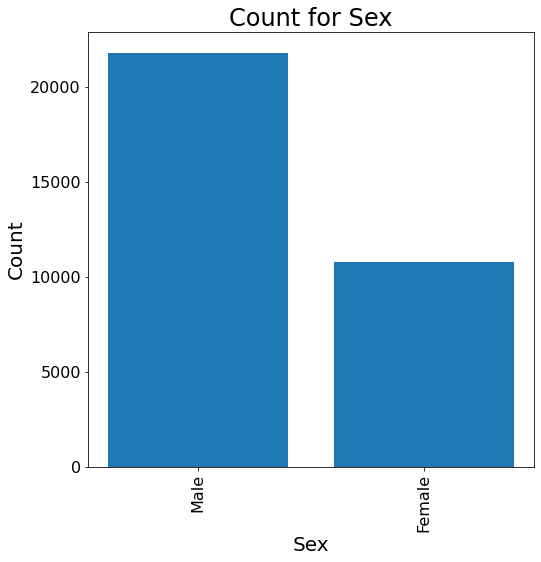

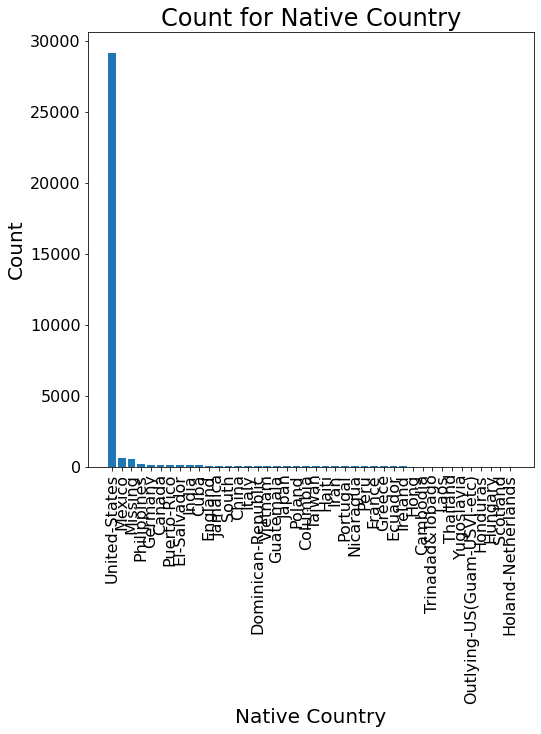

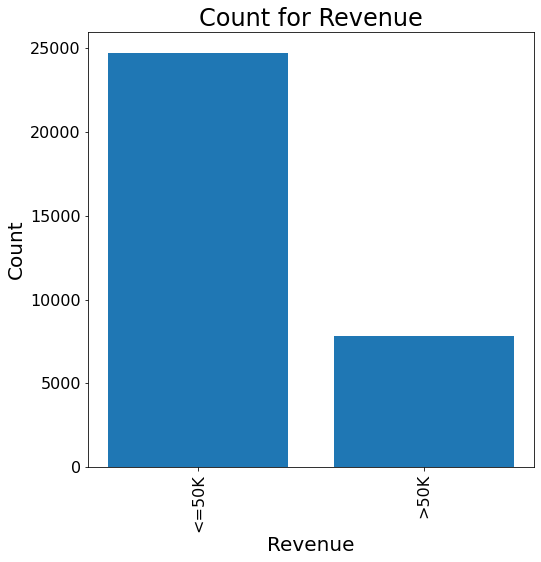

In [9]:
num_cols = ['age', 'fnlwgt', 'education_num', 'hours_per_week']
cat_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship',
            'race', 'sex', 'native_country', 'revenue']

column_name_map = {'age': "Age", 'fnlwgt': 'Final Weight',
                  'education_num': "Number of Years of Education",
                  'hours_per_week': "Hours Worked Per Week",
                  'workclass': 'Working Class',
                  'education': "Education Level",
                  'marital_status': "Marital Status",
                  'occupation': "Occupation",
                  'relationship': "Relationship",
                  'race': 'Race',
                  'sex': "Sex",
                  'native_country': "Native Country",
                  'revenue': "Revenue"}
for col in num_cols:
    plt.figure(figsize = (8,8))
    plt.hist(data[col], bins = 80, density = True)
    
    mu, std = norm.fit(data[col]) 
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)

    plt.plot(x, p, 'k', linewidth=2)
    plt.xticks(size = 16)
    plt.yticks(size = 16)
    plt.xlabel(column_name_map[col], size = 20)
    plt.ylabel('Count', size = 20)
    plt.title('Histogram for ' + column_name_map[col], size = 24)
    
for col in cat_cols:
    plt.figure(figsize = (8,8))
    value_counts = data[col].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column_name_map[col], size = 20)
    plt.xticks(rotation = 90, size = 16)
    plt.yticks(size = 16)
    plt.ylabel('Count', size = 20)
    plt.title('Count for ' + column_name_map[col], size = 24)

               age        fnlwgt  education_num  capital_gain  capital_loss  \
count  2553.000000  2.553000e+03    2553.000000   2553.000000        2553.0   
mean     43.870349  1.877761e+05      10.950646   7516.444575           0.0   
std      13.390214  1.034993e+05       2.632074   5581.898066           0.0   
min      17.000000  1.930200e+04       1.000000    114.000000           0.0   
25%      34.000000  1.177600e+05       9.000000   3325.000000           0.0   
50%      42.000000  1.759430e+05      10.000000   6514.000000           0.0   
75%      52.000000  2.364360e+05      13.000000   8614.000000           0.0   
max      90.000000  1.033222e+06      16.000000  41310.000000           0.0   

       hours_per_week  
count     2553.000000  
mean        43.118684  
std         12.087051  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         50.000000  
max         99.000000  


Text(0.5, 1.0, 'Histogram for capital_gain')

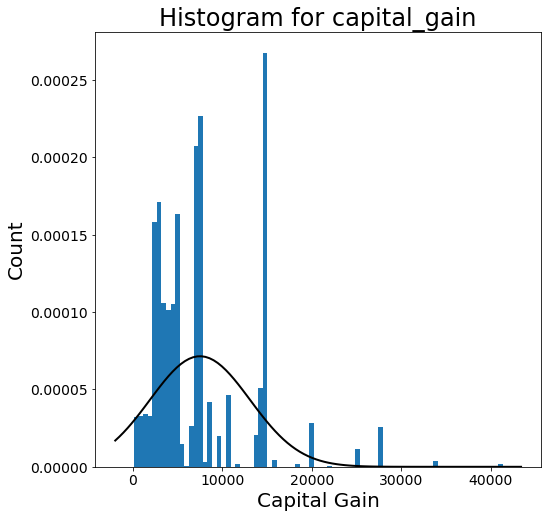

In [10]:
data_copy = data[data['capital_gain']>0]
data_copy = data_copy[data_copy['capital_gain'] < 80000]

print(data_copy.describe())

plt.figure(figsize = (8,8))
plt.hist(data_copy['capital_gain'], bins = 80, density = True)
mu, std = norm.fit(data_copy['capital_gain']) 
    
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Capital Gain', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel('Count', size = 20)
plt.title('Histogram for capital_gain', size = 24)

Text(0.5, 1.0, 'Histogram for capital_loss')

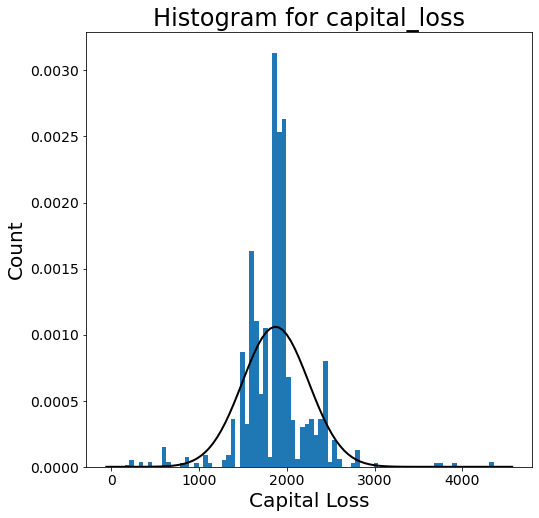

In [11]:
data_copy = data[data['capital_loss']>0]
plt.figure(figsize = (8,8))
plt.hist(data_copy['capital_loss'], bins = 80, density = True)
mu, std = norm.fit(data_copy['capital_loss']) 
    
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Capital Loss', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel('Count', size = 20)
plt.title('Histogram for capital_loss', size = 24)

In [12]:
test = data[data['capital_gain'] != 0]
print(len(test[test['capital_loss'] == 0]))
test = data[data['capital_gain'] == 0]
print(len(test[test['capital_loss'] != 0]))
print(len(test[test['capital_loss'] == 0]))

2712
1519
28330


In [13]:
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

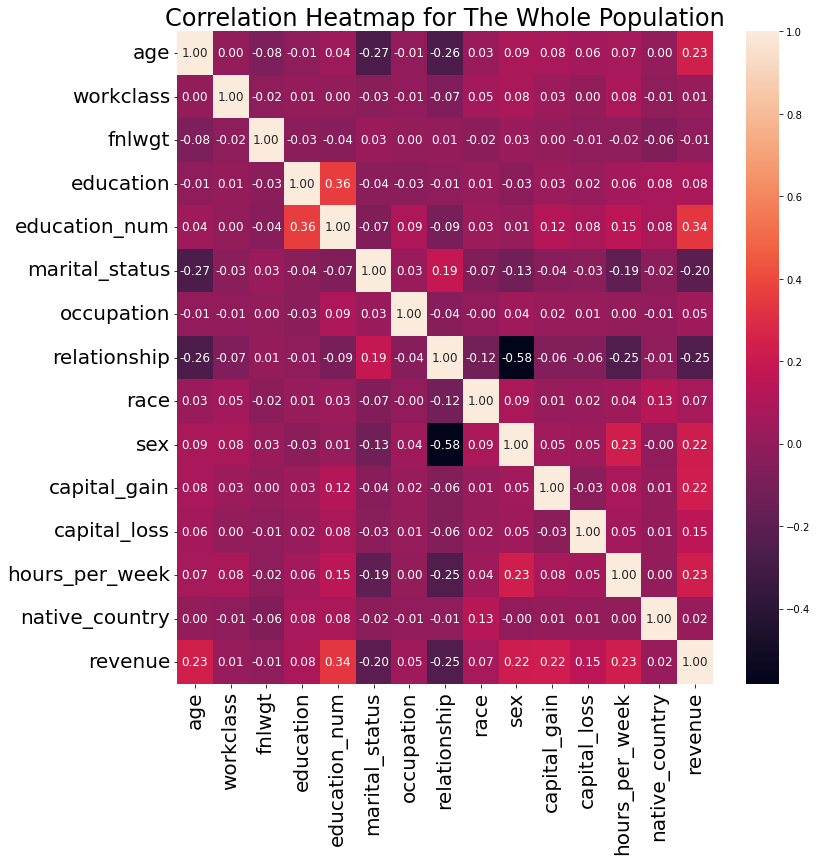

In [14]:
plt.figure(figsize = (12,12))
sns.heatmap(data.corr(), annot = True, annot_kws = {"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap for The Whole Population', size = 24)
plt.xticks(rotation = 90, size = 20)
plt.yticks(rotation = 0, size = 20)
plt.show()

In [15]:
data['capital_pnl'] = data['capital_gain'] - data['capital_loss']

Text(0.5, 1.0, 'Histogram for Capital PnL')

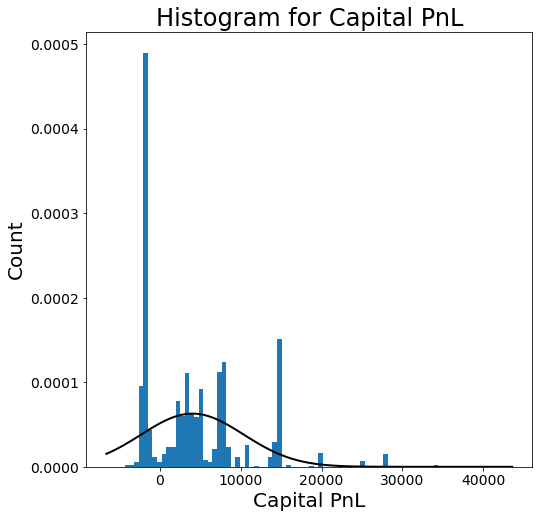

In [16]:
data_copy = data[data['capital_pnl']!=0]
data_copy = data_copy[data_copy['capital_pnl'] < 80000]
plt.figure(figsize = (8,8))
plt.hist(data_copy['capital_pnl'], bins = 80, density = True)
mu, std = norm.fit(data_copy['capital_pnl']) 
    
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Capital PnL', size = 20)
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.ylabel('Count', size = 20)
plt.title('Histogram for Capital PnL', size = 24)

### Vanilla Model

### Model for Investors vs Non Investors

In [17]:
investors = data[data['capital_pnl'] != 0]
non_investors = data[data['capital_pnl'] == 0]

In [18]:
investors.drop(['capital_gain', 'capital_loss'], axis = 1, inplace = True)
non_investors.drop(['capital_gain', 'capital_loss', 'capital_pnl'], axis = 1, inplace = True)

/home/aryan/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


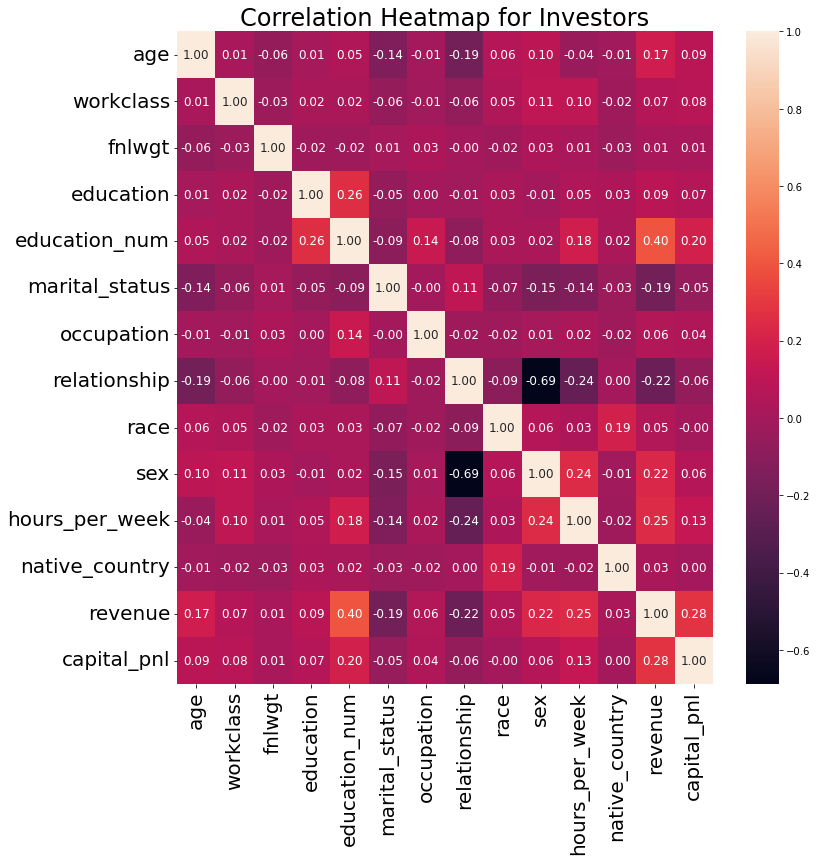

In [19]:
plt.figure(figsize = (12,12))
sns.heatmap(investors.corr(), annot = True, annot_kws = {"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap for Investors', size = 24)
plt.xticks(rotation = 90, size = 20)
plt.yticks(rotation = 0, size = 20)
plt.show()

- Correlation Between revenue and number of years of education
- Inverse Correlation between relationship and sex
- Correlation between the revenue earned and hours_per_week

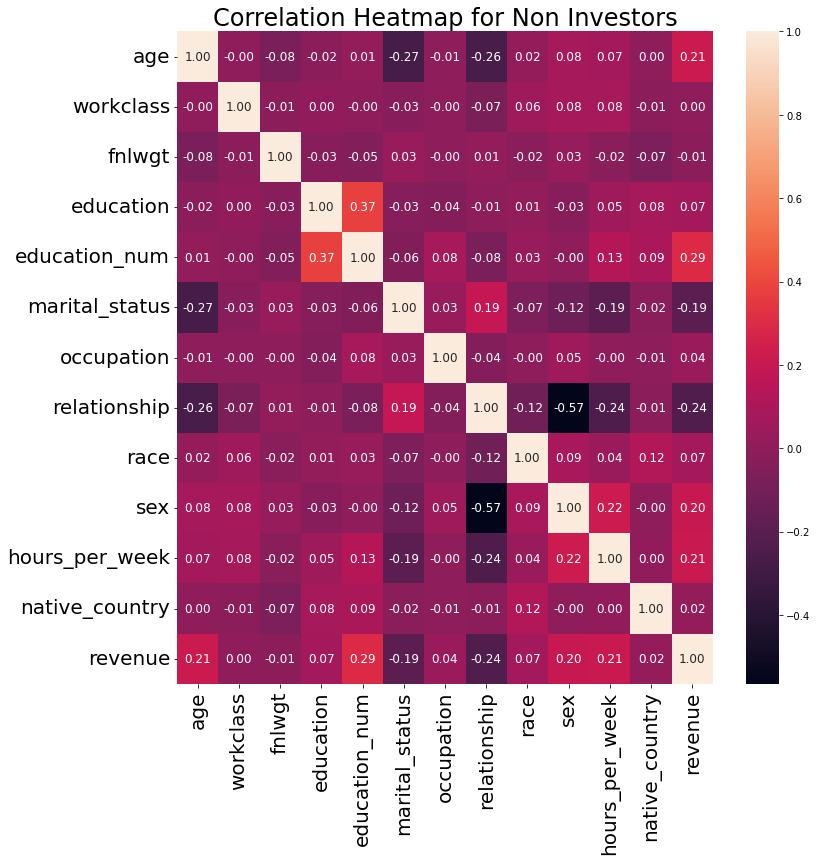

In [20]:
plt.figure(figsize = (12,12))
sns.heatmap(non_investors.corr(), annot = True, annot_kws = {"size": 12}, fmt='.2f')
plt.title('Correlation Heatmap for Non Investors', size = 24)
plt.xticks(rotation = 90, size = 20)
plt.yticks(rotation = 0, size = 20)
plt.show()

- Revenue vs age
- revenue vs education_num
- revenue vs relationship
- marital_status vs age
- relationship vs age

In [42]:
X = data.drop(['revenue', 'capital_gain', 'capital_loss'], axis = 1)
y = data['revenue']
X_investor = investors.drop(['revenue'], axis = 1)
y_investor = investors['revenue']
X_non_investor = non_investors.drop(['revenue'], axis = 1)
y_non_investor = non_investors['revenue']

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=0)

X_train_investor, X_val_investor, y_train_investor, y_val_investor = train_test_split(
    X_investor, y_investor, test_size=0.15, random_state=0)

X_train_non_investor, X_val_non_investor, y_train_non_investor, y_val_non_investor = train_test_split(
    X_non_investor, y_non_investor, test_size=0.15, random_state=0)

In [44]:
## Vanilla Fit
vanilla = GaussianNB()
vanilla.fit(X_train, y_train)

y_pred = vanilla.predict(X_val)

print("F1 Score for Vanilla Model: ", f1_score(y_pred, y_val))

F1 Score for Vanilla Model:  0.33507170795306385


In [45]:
## investor Fit
investor = GaussianNB()
investor.fit(X_train_investor, y_train_investor)

y_pred_investor = investor.predict(X_val_investor)

print("F1 Score for Investor Model: ", f1_score(y_pred_investor, y_val_investor))

F1 Score for Investor Model:  0.7454844006568144


In [46]:
## non_investor Fit
non_investor = MultinomialNB()
non_investor.fit(X_train_non_investor, y_train_non_investor)

y_pred_non_investor = non_investor.predict(X_val_non_investor)

print("F1 Score for Non-Investor Model: ", f1_score(y_pred_non_investor, y_val_non_investor))

F1 Score for Non-Investor Model:  0.34902411021814006


In [47]:
vanilla_mean = pd.DataFrame(vanilla.theta_, columns = X.columns).T
vanilla_mean.columns = ['Revenue <= 50K', "Revenue >50K"]
vanilla_mean

,Revenue <= 50K,Revenue >50K
age,36.773244,44.162882
workclass,3.878490,3.908858
fnlwgt,190242.214153,187374.587908
education,10.133019,10.853361
education_num,9.583916,11.616784
marital_status,2.788034,2.078057
occupation,6.330432,6.791397
relationship,1.678604,0.721161
race,3.627859,3.771545
sex,0.611452,0.852609


In [48]:
vanilla_mean = pd.DataFrame(vanilla.sigma_, columns = X.columns).T
vanilla_mean.columns = ['Revenue <= 50K', "Revenue >50K"]
vanilla_mean

,Revenue <= 50K,Revenue >50K
age,2.069172e+02,1.221455e+02
workclass,1.290551e+01,1.351802e+01
fnlwgt,1.126458e+10,1.049606e+10
education,2.816591e+01,1.902911e+01
education_num,1.700481e+01,1.676584e+01
marital_status,1.372054e+01,1.181185e+01
occupation,2.974118e+01,3.037753e+01
relationship,1.347789e+01,1.354272e+01
race,1.186135e+01,1.162498e+01
sex,1.131902e+01,1.120711e+01


In [49]:
investor_mean = pd.DataFrame(investor.theta_, columns = X_investor.columns).T
investor_mean.columns = ['Revenue <= 50K', "Revenue >50K"]
investor_mean

,Revenue <= 50K,Revenue >50K
age,40.707702,45.082812
workclass,3.818960,4.004333
fnlwgt,186038.717577,188183.861338
education,10.271231,10.838710
education_num,9.780777,11.946558
marital_status,2.634628,2.110737
occupation,6.356814,6.868079
relationship,1.468729,0.735195
race,3.691244,3.776119
sex,0.647136,0.848339


In [50]:
investor_mean = pd.DataFrame(investor.sigma_, columns = X_investor.columns).T
investor_mean.columns = ['Revenue <= 50K', "Revenue >50K"]
investor_mean

,Revenue <= 50K,Revenue >50K
age,2.395507e+02,1.295570e+02
workclass,1.237823e+01,1.242134e+01
fnlwgt,1.035463e+10,1.002059e+10
education,2.483711e+01,1.813632e+01
education_num,1.659863e+01,1.598519e+01
marital_status,1.286211e+01,1.102297e+01
occupation,2.992622e+01,2.865191e+01
relationship,1.262382e+01,1.256549e+01
race,1.083049e+01,1.069575e+01
sex,1.039117e+01,1.029148e+01


In [54]:
non_investor_mean = pd.DataFrame(non_investor.feature_log_prob_, columns = X_non_investor.columns).T
non_investor_mean.columns = ['Revenue <= 50K', "Revenue >50K"]
non_investor_mean

,Revenue <= 50K,Revenue >50K
age,-8.563115,-8.361959
workclass,-10.802544,-10.783542
fnlwgt,-0.000791,-0.000889
education,-9.847285,-9.759576
education_num,-9.900871,-9.706207
marital_status,-11.134138,-11.418490
occupation,-10.306366,-10.231865
relationship,-11.637592,-12.455309
race,-10.871057,-10.813991
sex,-12.652151,-12.306726
